In [160]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize as optimization

In [161]:
# Stocks Consdered
stocks = ["TSLA","GOOGL","BLK","AMZN","DIS", "PFE"]

#Start Date and End Date
start_date = "2013-01-01"
end_date = "2022-01-01"

# Avarege Trading days 252 in a year
trading_days = 252

#Weights
num_portfolio = 10000

In [162]:
#Gathering Data

def import_data():
    
    stock_data = {}
    
    for stock in stocks:  #closing value
        ticker = yf.Ticker(stock)
        data = ticker.history(start = start_date, end = end_date)["Close"]
        data.index = data.index.date   # removing time from data
        data = data.round(3)    #Rounding off data upto 3 decimal place
        stock_data[stock] = data
        
    return pd.DataFrame(stock_data)

print(import_data())

               TSLA    GOOGL      BLK     AMZN      DIS     PFE
2013-01-02    2.357   18.099  162.016   12.866   46.455  16.662
2013-01-03    2.318   18.110  162.458   12.924   46.555  16.624
2013-01-04    2.293   18.468  166.021   12.958   47.446  16.694
2013-01-07    2.289   18.387  165.717   13.423   46.336  16.707
2013-01-08    2.245   18.351  163.151   13.319   46.146  16.733
...             ...      ...      ...      ...      ...     ...
2021-12-27  364.647  147.906  877.700  169.669  152.800  55.589
2021-12-28  362.823  146.687  876.987  170.661  155.200  54.471
2021-12-29  362.063  146.655  865.475  169.201  154.870  54.068
2021-12-30  356.780  146.201  869.319  168.645  155.930  54.838
2021-12-31  352.260  144.852  871.031  166.717  154.890  55.448

[2267 rows x 6 columns]


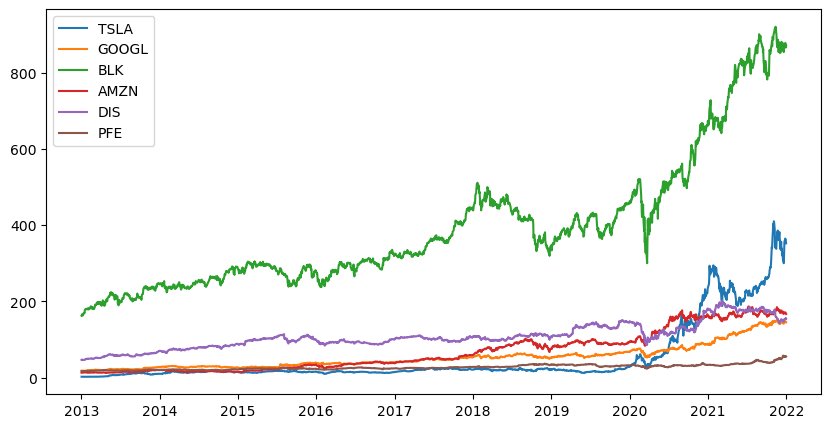

In [163]:
def show_data(data):
    data.plot(figsize=(10,5))
    plt.show()
      
show_data(import_data())

In [164]:
# Calculating Returns

def ln_returns(data):  # we calculate log returns so that it can be normalized and we can measure all variables in comparable matric
    log_return = np.log(data/data.shift(1))
    return log_return[1:]

log_daily_returns = ln_returns(import_data()) 
print(log_daily_returns)

                TSLA     GOOGL       BLK      AMZN       DIS       PFE
2013-01-03 -0.016685  0.000608  0.002724  0.004498  0.002150 -0.002283
2013-01-04 -0.010844  0.019575  0.021695  0.002627  0.018958  0.004202
2013-01-07 -0.001746 -0.004396 -0.001833  0.035256 -0.023673  0.000778
2013-01-08 -0.019410 -0.001960 -0.015605 -0.007778 -0.004109  0.001555
2013-01-09 -0.000891  0.006518  0.002608 -0.000075  0.000390  0.017124
...              ...       ...       ...       ...       ...       ...
2021-12-27  0.024935  0.006709  0.009420 -0.008212 -0.005417  0.008309
2021-12-28 -0.005015 -0.008276 -0.000813  0.005830  0.015585 -0.020317
2021-12-29 -0.002097 -0.000218 -0.013214 -0.008592 -0.002129 -0.007426
2021-12-30 -0.014699 -0.003101  0.004432 -0.003291  0.006821  0.014141
2021-12-31 -0.012750 -0.009270  0.001967 -0.011498 -0.006692  0.011062

[2266 rows x 6 columns]


In [165]:
# Converting daily data to yearly

def show_stats(returns):
    print(returns.mean()*252)
    print(returns.cov()*252)
    
annual_returns = show_stats(log_daily_returns)
print(annual_returns)

TSLA     0.556822
GOOGL    0.231299
BLK      0.187052
AMZN     0.284886
DIS      0.133922
PFE      0.133708
dtype: float64
           TSLA     GOOGL       BLK      AMZN       DIS       PFE
TSLA   0.309216  0.046870  0.044625  0.055719  0.034593  0.016431
GOOGL  0.046870  0.064132  0.035722  0.045918  0.027552  0.019006
BLK    0.044625  0.035722  0.069081  0.032006  0.035584  0.024622
AMZN   0.055719  0.045918  0.032006  0.089579  0.023666  0.015037
DIS    0.034593  0.027552  0.035584  0.023666  0.062112  0.017136
PFE    0.016431  0.019006  0.024622  0.015037  0.017136  0.045356
None


In [166]:
# Calculating Mean and Variance

def mean_var(returns, weights):
    portfolio_returns = np.sum(returns.mean()*weights) * trading_days
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*trading_days,weights)))

In [167]:
def show_portfolios(returns, volatilities):
    plt.figure(figsize=(10, 7))
    plt.scatter(volatilities, returns, c=returns / volatilities, marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.show()

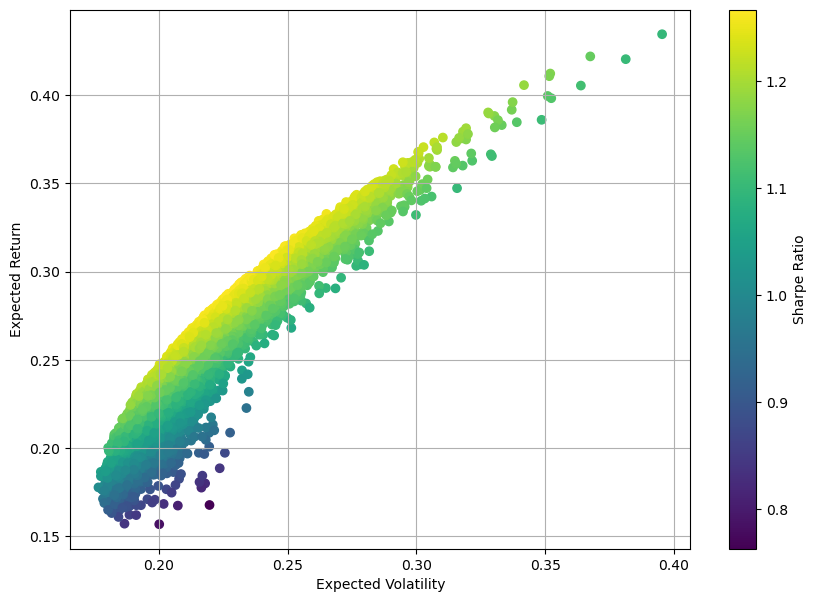

In [168]:
def generate_portfolios(returns):
    portfolio_mean = []
    portfolio_risk = []
    portfolio_weights = []
    
# Creating Random Portfolios
    for _ in range(num_portfolio):   #iteration
        w = np.random.random(len(stocks))
        w /= np.sum(w)
        portfolio_weights.append(w)
        portfolio_mean.append(np.sum(returns.mean() * w) * trading_days)
        portfolio_risk.append(np.sqrt(np.dot(w.T, np.dot(returns.cov()
                                                          * trading_days, w))))

    return np.array(portfolio_weights), np.array(portfolio_mean), np.array(portfolio_risk)

pweights, mean, risk = generate_portfolios(log_daily_returns)
show_portfolios(mean, risk)

In [169]:
def statistics(weights, returns):
    portfolio_returns = np.sum(returns.mean() * weights) * trading_days
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * trading_days, weights)))
    return np.array([portfolio_returns, portfolio_volatility, portfolio_returns/portfolio_volatility])

In [170]:
def min_sharpe(weights, returns):
    return -statistics(weights, returns)[2]   #2 is index of statistics return (portfolio_returns/portfolio_volatility)

In [171]:
# f(x)=0 this is the function to minimize
# using optimixation.minimize we will find highest sharpe ratio to get optimum portfolio as there is no maximum function in Scipy library
def optimize_portfolio(weights, returns):
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) # the sum of weights is 1
    bounds = tuple((0, 1) for _ in range(len(stocks))) # the weights can be 1 at most: 1 when 100% of money is invested into a single stock
    return optimization.minimize(fun=min_sharpe, x0=weights[0], args=returns, method='SLSQP', bounds=bounds, constraints=constraints)

In [172]:
def print_optimal_portfolio(optimum, returns):
    print("Optimal Portfolio: ", optimum['x'].round(3))
    print("Expected Return, Volatility, Sharpe Ratio: ", statistics(optimum['x'].round(3), returns))

In [173]:
def show_optimal_portfolio(opt, rets, portfolio_rets, portfolio_vols):
    plt.figure(figsize=(10, 6))
    plt.scatter(portfolio_vols, portfolio_rets, c=portfolio_rets / portfolio_vols, marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.plot(statistics(opt['x'], rets)[1], statistics(opt['x'], rets)[0], 'r*', markersize=10.0)
    plt.show()

Optimal Portfolio:  [0.231 0.198 0.015 0.286 0.    0.27 ]
Expected Return, Volatility, Sharpe Ratio:  [0.29480748 0.23219252 1.26966826]


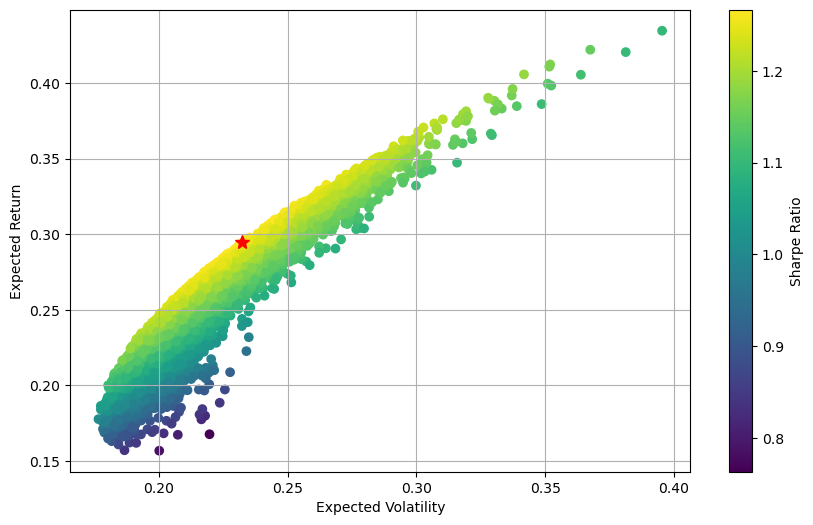

In [174]:
optimum = optimize_portfolio(pweights, log_daily_returns)
print_optimal_portfolio(optimum, log_daily_returns)
show_optimal_portfolio(optimum, log_daily_returns, mean, risk)

In this portfolio, Sharpe ratio is <b>1.269</b>, which can be considered <b>good investment</b>. As we can see from the optimal portfolio we wont be investing any wealth in The Walt Disney Company (DIS) stock.